In [27]:
import numpy as np

In [28]:
import pandas as pd 
import matplotlib.pyplot as plt 
from functools import reduce
 
def parse_if_number(s): 
    try: return float(s) 
    except: return True if s=="true" else False if s=="false" else s if s else None 
 
def parse_ndarray(s): 
    return np.fromstring(s, sep=' ') if s else None 

import seaborn as sns

In [29]:
# vector Name
pdr_vector = 'periodCAM:vector'
pdr_mean_vector = 'periodCAM:mean'
# pdr_dist_vector = 'txRxDistanceTB:vector'
# pdr_recv_vector = 'tbReceived:vector'

csvName = [
#     'test-w9wv.csv',  # Aircomp simepl 10dura
#     'test-lp5t.csv',  # CAM simepl 10dura
#     'test-u6jr.csv',  # Base simepl 100dur
#     'test-r9ur.csv',  # AIrcomp simepl 100dur
#     'test-vq14.csv',  # AIrcomp simepl 20dur
#     'test-lf8x.csv',  # AIrcomp simepl 50dur
#     'test-gi4c.csv',  # AIrcomp simepl 70dur
#     'test-h1f1.csv',  # Base simepl 100dura
#     'test-4dvv.csv',  # Base simepl 10dura
#     'test-0w6z.csv',  # AIrcomp lust 70dur
#     'test-wvbp.csv',  # CAM lust 10dur
#     'test-1hkq.csv',  # Base lust 100dur
    
    'test-imrh.csv',  # AIrcomp lust 70dur
    'test-ug7h.csv',  # CAM lust 10dur
]

In [30]:

#  opp_scavetool export -f '("periodCAM:vector")' -F CSV-R CAM-0-20221109-09\:16\:01-10447.sca CAM-0-20221109-09\:16\:01-10447.vec -o test-period-sztm.csv

for x in range(len(csvName)): 
    print(csvName[x])

test-imrh.csv
test-ug7h.csv


In [31]:
def PacketDeliveryRate(filename, case):
    
    print(filename)
    
    x = []
    y = []
    decoded = []
    
    df = pd.read_csv("./CSV/"+filename, converters = { 
        'attrvalue': parse_if_number, 
#         'binedges': parse_ndarray, 
#         'binvalues': parse_ndarray, 
        'vectime': parse_ndarray, 
        'vecvalue': parse_ndarray,
        'value': parse_if_number
    })

    decoded = df[(df["name"] == pdr_vector) & (df["vectime"].notnull())] 
    decoded = decoded[["module", "vecvalue"]] 
#     decoded["mean"] = decoded[["vecvalue"]].mean(axis = 0)
    decoded.rename(columns={"vecvalue": "decode"}, inplace=True) 
    mean = df[(df["name"] == pdr_mean_vector) & (df["value"].notnull())] 
    mean = mean[["module", "value"]] 
    mean.rename(columns={"value": "mean"}, inplace=True) 
    
#     decoded.info()
#     mean.info()
    
    data_frames = [decoded, mean]
    new_df = reduce(lambda  left,right: pd.merge(left,right,on=['module'], how='inner'), data_frames)
    
#     display(new_df)
    
#     bins = []
#     for i in range(50): 
#         bins.append({"count": 0, "success": 0}) 
 
#     for row in new_df.itertuples(): 
#         for i in range(len(row.distance)): 
#             if row.distance[i] < 500: 
#                 # Ensures that we have everything in 10m chunks 
#                 remainder = int(row.distance[i] // 10) 
# #                 if row.received[i] >= 0 and row.decode[i] >= 0: 
#                 if row.decode[i] >=0:
#                     # Only count TBs sent i.e. -1 will be ignored in result 
#                     bins[remainder]["count"] += 1 
# #                     bins[remainder]["count"] += row.received[i] 
#                     bins[remainder]["success"] += row.decode[i] 
                      
#     pdrs = [] 
#     distances = [] 
#     distance = 0 
#     for dictionary in bins: 
#         if dictionary["count"]>0:
#             pdrs.append((dictionary["success"] / dictionary["count"] * 100)) 
# #             pdrs.append((dictionary["success"])) 
#         else: 
#             print('error: ', distance)
#             pdrs.append((dictionary["success"] / 1 * 100)) 
#         distances.append(distance) 
#         distance += 10
#     plt.plot(distances, pdrs, label = case)

#     plt.plot(decoded["vecvalue"], decoded["decode"])
#     plt.hist(flights['arr_delay'], bins = int(180/5))
#     plt.hist(new_df['mean'], bins = 20, edgecolor = 'black')
    sns.distplot(new_df['mean'], label=case)
    
#     plt.xlim([0, 0.2])
#     plt.ylim([0, 100])
    plt.xlabel('Average Broadcast Period (sec)')
    plt.ylabel('Frequency')
    plt.grid()
    plt.legend()

test-imrh.csv


/home/alanqq0624/.conda/envs/sumo/lib/python3.7/site-packages/ipykernel_launcher.py:67: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



test-ug7h.csv


/home/alanqq0624/.conda/envs/sumo/lib/python3.7/site-packages/ipykernel_launcher.py:67: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


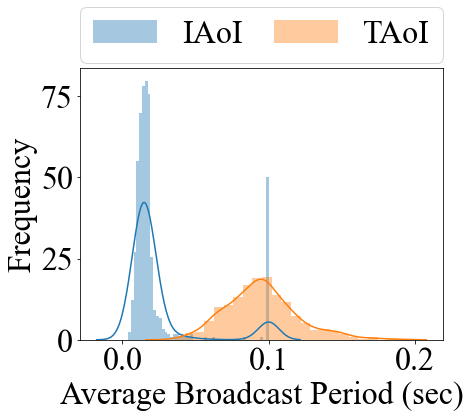

In [32]:
import matplotlib.pyplot as plt
import csv
from matplotlib.ticker import NullFormatter  # useful for `logit` scale
fig = plt.figure(figsize=(6.5, 5))
plt.rcParams.update({
    'font.size': 32, 
    "font.family": "serif", 
    "font.serif": ["Times New Roman"]
})

PacketDeliveryRate(csvName[0], "IAoI")
PacketDeliveryRate(csvName[1], "TAoI")

plt.gca().yaxis.set_minor_formatter(NullFormatter())


plt.legend(loc="lower left", bbox_to_anchor=(0, 1.02, 1, 0.2),
                mode="expand", borderaxespad=0, ncol=2, prop={'weight': 'ultralight'})
# plt.tight_layout()
# plt.subplots_adjust(top=0.83, bottom=0.2, left=0.15, right=0.93)
# plt.grid()
plt.savefig("period_PDF_new.eps", format='eps', bbox_inches='tight')
plt.show()


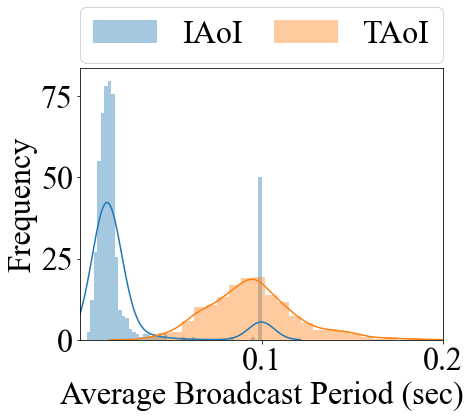

In [33]:
fig.set_size_inches(6.5, 5)
fig.gca().set_xlim([0.00001, 0.2])
fig.gca().legend(loc="lower right", bbox_to_anchor=(0, 1.02, 1, 0.2),
                mode="expand", borderaxespad=0, ncol=2)
fig.savefig("period_PDF_new_mod.png", format='png', bbox_inches='tight')
fig